<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_python/Simple_CNN_MNIST_10class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이미지 분류 모형 : CNN 추가 후 정확도가 좋아졌다.

In [1]:
import tensorflow as tf
# print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1) #a single 4D list that is 60,000x28x28x1
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), #생성하려는 컨볼 루션 수입니다. 순전히 임의적이지만 32 단계부터 시작하는 것이 좋습니다.
  tf.keras.layers.MaxPooling2D(2, 2), #MaxPooling에 (2,2)를 지정하면 효과는 이미지 크기의 4 분의 1입니다.
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
___________________________________________________________

시각화

In [2]:
print(test_labels[:100]) #테스트 세트의 처음 100 개의 레이블

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


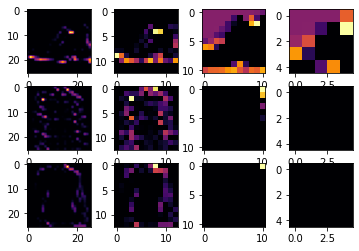

In [3]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [4]:
import tensorflow as tf
#print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2922 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0504 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0304 - accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0181 - accuracy: 0.9945
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0131 - accuracy: 0.9957
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0075 - accuracy: 0.9980
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0084 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0046 - accuracy: 0.9985
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0051 - accuracy: 0.9984

추가 확인할 내용
1. Convolutions을 32에서 16 or 64으로 변경해보기

2. 마지막 Convolution을 제거해보기

3. Convolution을 더 추가 해보기

4. 첫번째 Convolution을 제외한 나머지 layer 모두 삭제해보기

5. Callback추가하기